In [1]:
from specialist_data import manager
from models.specialist import Specialist

batch_size = 500
interval = batch_size/1000

In [2]:
# Run specialist in all seeds
for seed, transformed in manager.transformed.items():
    specialist = Specialist(transformed, seed)
    specialist.evolve_process(interval=interval, max_limit=35)

Iteration 1, loss = 0.66700542
Iteration 2, loss = 0.70144978
Iteration 3, loss = 0.64904109
Iteration 4, loss = 0.65437079
Iteration 5, loss = 0.65827873
Iteration 6, loss = 0.62085325
Iteration 7, loss = 0.61721039
Iteration 8, loss = 0.68477923
Iteration 9, loss = 0.62332301
Iteration 10, loss = 0.62265895
Iteration 11, loss = 0.64316220
Iteration 12, loss = 0.60721732
Iteration 13, loss = 0.60977797
Iteration 14, loss = 0.60640765
Iteration 15, loss = 0.61539906
Iteration 16, loss = 0.58005968
Iteration 17, loss = 0.57628154
Iteration 18, loss = 0.58419055
Iteration 19, loss = 0.64765022
Iteration 20, loss = 0.56829345
Iteration 21, loss = 0.59844449
Iteration 22, loss = 0.56592453
Iteration 23, loss = 0.56259323
Iteration 24, loss = 0.56102312
Iteration 25, loss = 0.57825269
Iteration 26, loss = 0.58345219
Iteration 27, loss = 0.57147829
Iteration 28, loss = 0.57915223
Iteration 29, loss = 0.51303186
Iteration 30, loss = 0.57287401
Iteration 31, loss = 0.57942561
Iteration 32, los

In [8]:
import pandas as pd

# Get Specialist Score data
results = {}
describe = []

for seed in manager.transformed.keys():
    df = pd.read_csv(f'../../data/specialist/evolution/{batch_size}_batch_{seed}_score.csv')
    results[seed] = df
    describe.append([
        seed,
        df.score.mean(),
        df.score.skew(),
        df.score.std(),
        df.score.min(),
        df.score.max()
    ])

describe_df = pd.DataFrame(
    describe,
    columns=['seed', 'mean', 'skew', 'std', 'min', 'max']
)


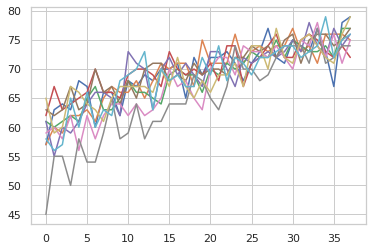

{'whiskers': [<matplotlib.lines.Line2D at 0x7f65f4cf8d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f660f4961f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f65f4cf8280>,
 'medians': [<matplotlib.lines.Line2D at 0x7f65f505b8e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f65f2a9da60>,
 'means': []}

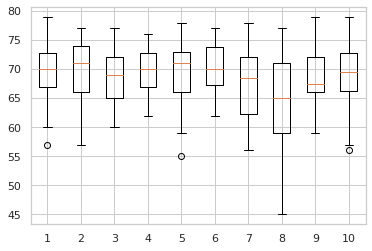

In [17]:
import matplotlib.pyplot as plt
from graph_utils import *

for seed in results.values():
    plt.plot(seed.score)
plt.show()

scores = [seed.score for seed in results.values()]
plt.boxplot(scores)